<a href="https://colab.research.google.com/github/Yazir-Arafath/house_price_prediction-/blob/main/Chennai_house_price_prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **DATA CLEANING**

In [4]:
#read the csv file
data=pd.read_csv('/content/train-chennai-sale.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
#to get the shape of the data set
data.shape

(7109, 22)

In [6]:
#describe the dataset
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
#to get the basic information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
#to find the Nan values count in the data set
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
#dropping the unnecessary columns
data.drop(columns=['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','PRT_ID'],inplace=True)
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,208767,107060,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,346191,205551,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,317354,167028,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,425350,119098,8507000


In [10]:
#dropping only the rows with Nan Values of a column
data.dropna(axis=0,subset=['N_BEDROOM','N_BATHROOM'],inplace=True)

In [11]:
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
#changing the data types of columns to int
data['N_BEDROOM']=data['N_BEDROOM'].astype('int')
data['N_BATHROOM']=data['N_BATHROOM'].astype('int')

In [13]:
#changing the data types of columns to datetime format
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])

In [14]:
#creating a new column to find the age of the building
data['Building_Age']=(data['DATE_SALE']-data['DATE_BUILD'])/np.timedelta64(1,'Y')
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,Building_Age
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000,43.891387
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10.992697
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094,92114,13159200,19.581511
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290,21.985393
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250,29.574871


In [15]:
#change the data type of the column
data['Building_Age']=data['Building_Age'].astype('int')

In [16]:
#finding the unique elements of the column
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [17]:
#replacing duplicates
mappings={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
data['AREA']=data['AREA'].replace(mappings)

In [18]:
#finding the unique elements of the column
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [19]:
#replacing duplicates
data=data.replace(to_replace=['Ab Normal'],value='AbNormal')
data=data.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
data=data.replace(to_replace=['AdjLand'],value='Adj Land')

In [20]:
#finding the unique elements of the column
data['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [21]:

#replacing duplicates
data=data.replace(to_replace=['Noo'],value='No')

In [22]:
#finding the unique elements of the column
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [23]:
#replacing duplicates
mappings={'Comercial':'Commercial','Other':'Others'}
data['BUILDTYPE']=data['BUILDTYPE'].replace(mappings)

In [24]:
#finding the unique elements of the column
data['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [25]:
#replacing duplicates
mappings={'AllPub':'All Pub','NoSewr ':'No Sewage','NoSeWa':'No Sewage'}
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace(mappings)

In [26]:
#finding the unique elements of the column
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [27]:
#replacing duplicates
mappings={'Pavd':'Paved','NoAccess':'No Access'}
data['STREET']=data['STREET'].replace(mappings)

In [28]:
#finding the unique elements of the column
data['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [29]:
#create a new column to find the year built
data['YEAR_BUILD']=data['DATE_BUILD'].dt.year

In [30]:
#create a new column to find the year sold
data['YEAR OF SALES']=data['DATE_SALE'].dt.year

# **Data visualization**

Text(0.5, 1.0, 'Area Wise Sales')

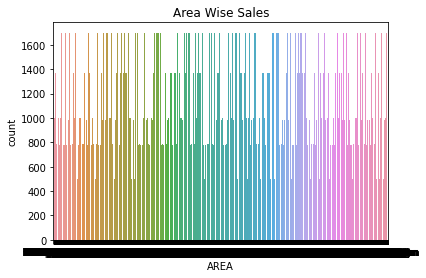

In [31]:
sns.countplot(data=data,x='AREA',order=data['AREA'])
plt.title('Area Wise Sales')

Text(0.5, 1.0, 'Sales Condition')

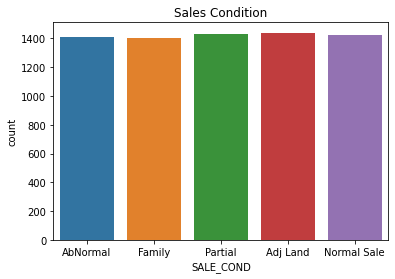

In [32]:
sns.countplot(data=data,x='SALE_COND')
plt.title('Sales Condition')

Text(0.5, 1.0, 'Parking Facility')

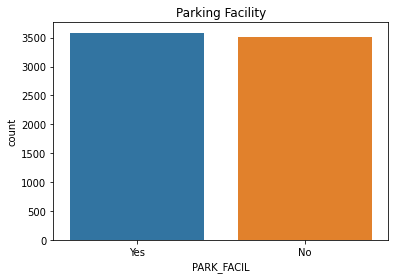

In [33]:
sns.countplot(data=data,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

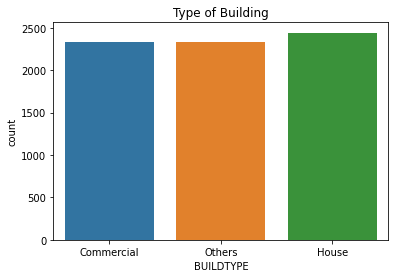

In [34]:
sns.countplot(data=data,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Utility Available')

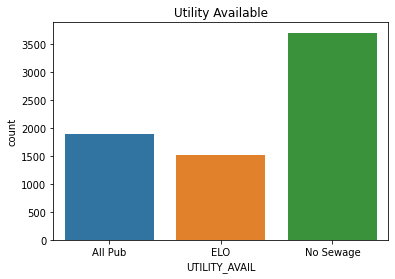

In [35]:
sns.countplot(data=data,x='UTILITY_AVAIL')
plt.title('Utility Available')

Text(0.5, 1.0, 'Street Type')

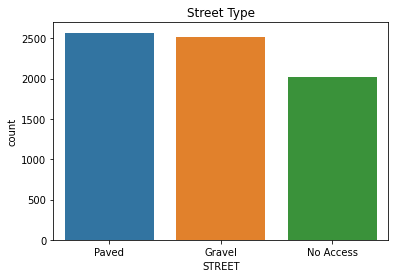

In [36]:
sns.countplot(data=data,x='STREET')
plt.title('Street Type')

Text(0.5, 1.0, 'Zones of Chennai')

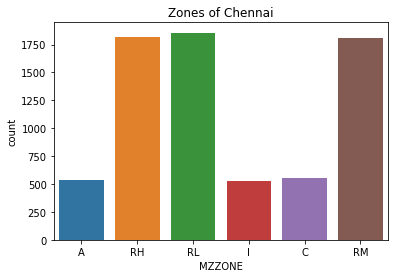

In [37]:
sns.countplot(data=data,x='MZZONE')
plt.title('Zones of Chennai')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Area in Squarefeet')

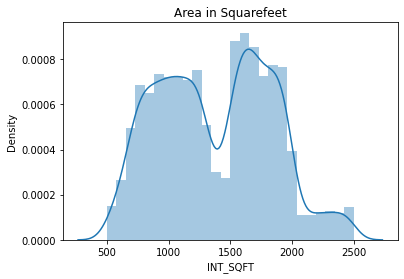

In [38]:
sns.distplot(data['INT_SQFT'])
plt.title('Area in Squarefeet')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

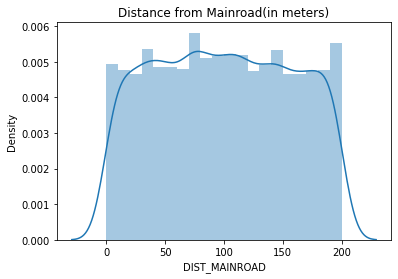

In [39]:

sns.distplot(data['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No of Bedrooms')

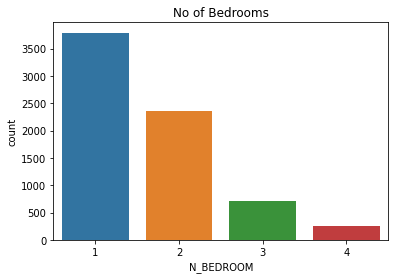

In [40]:

sns.countplot(data['N_BEDROOM'])
plt.title('No of Bedrooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of Bathrooms')

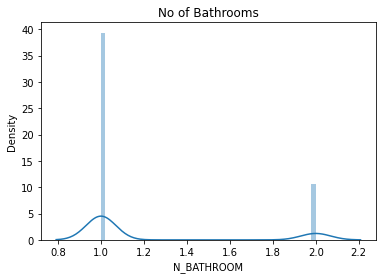

In [41]:

sns.distplot(data['N_BATHROOM'])
plt.title('No of Bathrooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of Rooms')

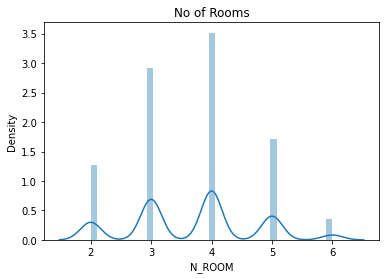

In [42]:
sns.distplot(data['N_ROOM'])
plt.title('No of Rooms')

In [43]:

temp =pd.DataFrame(data.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

In [44]:
temp =pd.DataFrame(data.groupby('INT_SQFT')['SALES_PRICE'].mean())
temp['INT_SQFT'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.histogram(temp,y='SALES_PRICE',x='INT_SQFT',nbins=25)

In [45]:

temp =pd.DataFrame(data.groupby('YEAR OF SALES')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['YEAR OF SALES']=temp.index
px.bar(temp,x='YEAR OF SALES',y='SALES_PRICE',color='SALES_PRICE')

In [46]:

temp =pd.DataFrame(data.groupby('DIST_MAINROAD')['SALES_PRICE'].mean())
temp['DIST_MAINROAD'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.histogram(temp,y='SALES_PRICE',x='DIST_MAINROAD',nbins=20)

In [47]:
temp =pd.DataFrame(data.groupby('N_BEDROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['N_BEDROOM']=temp.index
N_BEDROOM_values = temp.N_BEDROOM.unique()
px.bar(temp,x='N_BEDROOM',y='SALES_PRICE',color='SALES_PRICE')

In [48]:
temp =pd.DataFrame(data.groupby('N_BATHROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['N_BATHROOM']=temp.index
N_BATHROOM_values = temp.N_BATHROOM.unique()
px.bar(temp,x='N_BATHROOM',y='SALES_PRICE',color='SALES_PRICE')

In [49]:
temp =pd.DataFrame(data.groupby('SALE_COND')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['SALE_COND']=temp.index
SALE_COND_values = temp.SALE_COND.unique()
px.bar(temp,x='SALE_COND',y='SALES_PRICE',color='SALES_PRICE')

In [50]:
temp =pd.DataFrame(data.groupby('PARK_FACIL')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['PARK_FACIL']=temp.index
PARK_FACIL_values = temp.PARK_FACIL.unique()
px.bar(temp,x='PARK_FACIL',y='SALES_PRICE',color='SALES_PRICE')

In [51]:
temp =pd.DataFrame(data.groupby('BUILDTYPE')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['BUILDTYPE']=temp.index
BUILDTYPE_values = temp.BUILDTYPE.unique()
px.bar(temp,x='BUILDTYPE',y='SALES_PRICE',color='SALES_PRICE')


In [52]:
temp =pd.DataFrame(data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['UTILITY_AVAIL']=temp.index
UTILITY_AVAIL_values = temp.UTILITY_AVAIL.unique()
px.bar(temp,x='UTILITY_AVAIL',y='SALES_PRICE',color='SALES_PRICE')

In [53]:
temp =pd.DataFrame(data.groupby('STREET')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['STREET']=temp.index
STREET_values = temp.STREET.unique()
px.bar(temp,x='STREET',y='SALES_PRICE',color='SALES_PRICE')

In [54]:

temp =pd.DataFrame(data.groupby('MZZONE')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['MZZONE']=temp.index
MZZONE_values = temp.MZZONE.unique()
px.bar(temp,x='MZZONE',y='SALES_PRICE',color='SALES_PRICE')

In [55]:
temp =pd.DataFrame(data.groupby('YEAR_BUILD')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['YEAR_BUILD']=temp.index
px.bar(temp,x='YEAR_BUILD',y='SALES_PRICE',color='SALES_PRICE')

In [56]:
#exporting the cleaned data before label encoding
data.to_csv('Price Cleaned.csv')

In [57]:

data.head()


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,Building_Age,YEAR_BUILD,YEAR OF SALES
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,380000,144400,7600000,43,1967,2011
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,760122,304049,21717770,10,1995,2006
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094,92114,13159200,19,1992,2012
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,No Sewage,Paved,I,356321,77042,9630290,21,1988,2010
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,237000,74063,7406250,29,1979,2009


# **Label Encoding**

In [58]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()

In [59]:
#data['AREA']=le.fit_transform({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [60]:
#for column in data.columns:
 # if data[column].dtype == object:
  #  data[column] = le.fit_transform(data[column])

In [61]:
data['MZZONE']=data['MZZONE'].replace(to_replace=MZZONE_values,value=[1,2,3,4,5,6])

data['STREET']=data['STREET'].replace(to_replace=STREET_values,value=[1,2,3])

data['AREA']=data['AREA'].replace(to_replace=AREA_values,value=[1,2,3,4,5,6,7])

data['N_BEDROOM']=data['N_BEDROOM'].replace(to_replace=N_BEDROOM_values,value=[1,2,3,4])

data['N_BATHROOM']=data['N_BATHROOM'].replace(to_replace=N_BATHROOM_values,value=[1,2])

data['SALE_COND']=data['SALE_COND'].replace(to_replace=SALE_COND_values,value=[1,2,3,4,5])

data['PARK_FACIL']=data['PARK_FACIL'].replace(to_replace=PARK_FACIL_values,value=[1,2])

data['BUILDTYPE']=data['BUILDTYPE'].replace(to_replace=BUILDTYPE_values,value=[1,2,3])

data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace(to_replace=UTILITY_AVAIL_values,value=[1,2,3])

In [62]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,Building_Age,YEAR_BUILD,YEAR OF SALES
0,1,1004,2011-04-05,131,1,1,3,3,2,1967-05-15,3,3,2,1,380000,144400,7600000,43,1967,2011
1,6,1986,2006-12-19,26,2,1,5,3,1,1995-12-22,3,3,3,4,760122,304049,21717770,10,1995,2006
2,2,909,2012-04-02,70,1,1,3,3,2,1992-09-02,3,1,3,5,421094,92114,13159200,19,1992,2012
3,4,1855,2010-03-13,14,3,2,5,2,1,1988-03-18,2,2,2,3,356321,77042,9630290,21,1988,2010
4,1,1226,2009-05-10,84,1,1,3,3,2,1979-10-13,2,3,3,2,237000,74063,7406250,29,1979,2009


# **SPLITTING THE DATASET**

In [63]:
from sklearn.model_selection import train_test_split
X=data.drop(['REG_FEE','COMMIS','SALES_PRICE','DATE_SALE','DATE_BUILD'],axis=1)
Y=data['SALES_PRICE']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=124)

# **Machine Learning Algothirms**

# **LINEAR REGRESSION**

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

#predicting

ypred = lr.predict(x_test)
lr.score(x_test,y_test)*100

87.43172562487571

# **LASSO REGRESSION**

In [66]:
from sklearn.linear_model import Lasso
lasso=Lasso()
#fitting the model
lasso.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.626e+15, tolerance: 8.068e+12



Lasso()

In [67]:
#predicting the target value
y_pred=lasso.predict(x_test)
y_pred

#finding the score of the model
lasso_score=lasso.score(x_test,y_test)
print(lasso_score)
print('Lasso Regression score is :',lasso_score*100,'%')

0.8743165612160999
Lasso Regression score is : 87.43165612160999 %


# **RIDGE**

In [68]:
from sklearn.linear_model import Ridge
#fitting the model
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [69]:
#predicting the target value
y_pred=ridge.predict(x_test)
y_pred

array([10188707.07187669, 13336148.10835469, 10389979.8538513 , ...,
        5718337.79159494, 10635377.62291645, 13104291.16085766])

In [70]:
#finding the score of the model
ridge_score=ridge.score(x_test,y_test)
print(ridge_score)
print('Ridge Regression score is :',ridge_score*100,'%')

0.8743296620661617
Ridge Regression score is : 87.43296620661617 %


# **DECISION TREE**

In [71]:
from sklearn.tree import DecisionTreeRegressor
decisiontree=DecisionTreeRegressor()
#fitting the model
decisiontree.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
#predicting the target value
y_pred=decisiontree.predict(x_test)
y_pred

array([ 9304960., 14154300., 10308500., ...,  5032625., 10256260.,
       13404800.])

In [73]:
#finding the score of the model
dt_score=decisiontree.score(x_test,y_test)
print(dt_score)
print('Decision Tree Model score is :',dt_score*100,'%')

0.9700631805529174
Decision Tree Model score is : 97.00631805529174 %


# **RANDOM FOREST**

In [74]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(max_depth=10,n_estimators=150,random_state=10)
#fitting the model
randomforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=10)

In [75]:
#predicting the target value
y_pred=randomforest.predict(x_test)
y_pred

array([ 9179826.26596852, 13752382.1019936 ,  9472643.76220539, ...,
        5029949.25572146, 10025124.47511781, 13891523.0042831 ])

In [76]:
#finding the score of the model
rf_score=randomforest.score(x_test,y_test)
print(rf_score)
print('Random Forest Model score is :',rf_score*100,'%')

0.9851229771013063
Random Forest Model score is : 98.51229771013062 %


# **ADA BOOST**

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=150,random_state=10)
#fitting the model
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=150, random_state=10)

In [78]:
#predicting the target value
y_pred=ada.predict(x_test)
y_pred

array([ 9138143.41993186, 13918539.67391304,  9498374.64442815, ...,
        5708829.17594655, 11038929.56363636, 12810903.7242268 ])

In [79]:
#finding the score of the model
ada_score=ada.score(x_test,y_test)
print(ada_score)
print('Ada Boost Model score is :',ada_score*100,'%')

0.9347208973982709
Ada Boost Model score is : 93.4720897398271 %


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

99.11159634339243

# **Find the Best Model**

In [81]:
print('Lasso Regression Model score is :',lasso_score)
print('Ridge Regression Model score is :',ridge_score)
print('Decision Tree Model score is :',dt_score)
print('Random Forest Model score is :',rf_score)
print('Ada Boost Model score is :',ada_score)

Lasso Regression Model score is : 0.8743165612160999
Ridge Regression Model score is : 0.8743296620661617
Decision Tree Model score is : 0.9700631805529174
Random Forest Model score is : 0.9851229771013063
Ada Boost Model score is : 0.9347208973982709


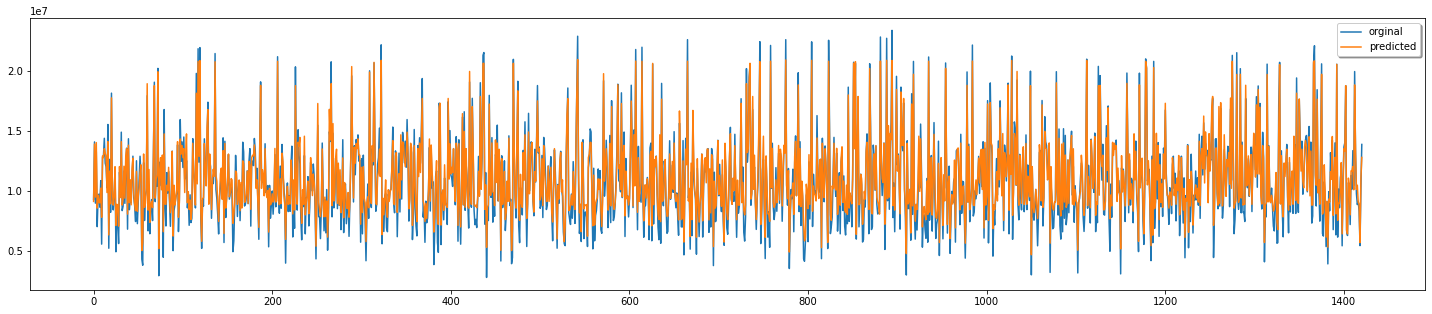

In [82]:
## Ploting the randomforest
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,y_pred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

# **Feature Importance**

In [83]:
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

AREA             48.091591
BUILDTYPE        33.306818
INT_SQFT         11.188550
MZZONE            3.763754
PARK_FACIL        1.454594
STREET            0.988423
N_ROOM            0.285947
Building_Age      0.208170
YEAR_BUILD        0.185072
SALE_COND         0.143951
DIST_MAINROAD     0.136619
YEAR OF SALES     0.073969
N_BATHROOM        0.072250
N_BEDROOM         0.052665
UTILITY_AVAIL     0.047626
dtype: float64

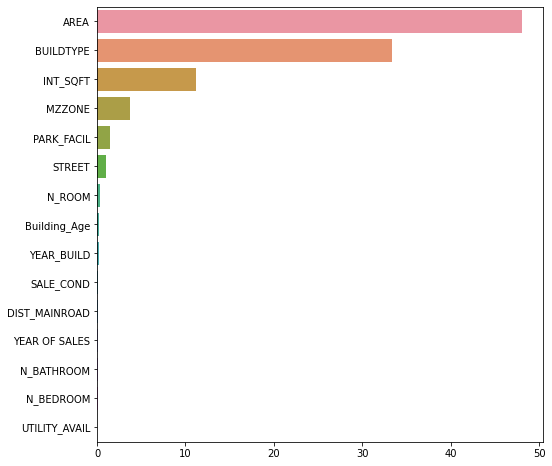

In [84]:
#plotting the feature importance
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [85]:
#filtering the important featres
main_features=feature_scores.loc[feature_scores >0.6]
main_features

AREA          48.091591
BUILDTYPE     33.306818
INT_SQFT      11.188550
MZZONE         3.763754
PARK_FACIL     1.454594
STREET         0.988423
dtype: float64

In [86]:
x=data[main_features.index]

# **Training best model** 

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2, random_state=20)
RandomForest=RandomForestRegressor(max_depth=10,n_estimators=150,random_state=10)
#fitting the model
RandomForest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=10)

In [88]:
#predicting the target value
y_pred=RandomForest.predict(x_test)
y_pred

array([13058851.83451183,  9108868.63570976,  8080000.10411644, ...,
       13185210.50454429,  7142291.10479436,  9483784.23666563])

In [89]:
#finding the score of the model
rf_score=RandomForest.score(x_test,y_test)
print(rf_score)
print('Random Forest Model score is :',rf_score*100,'%')

0.9843519416434976
Random Forest Model score is : 98.43519416434975 %


In [90]:
#Predicting the Price Range for a new input
from babel.numbers import format_currency
value=RandomForest.predict([[1500,1,2,3,2,1]])
low=int(value-(value*0.02))
low=format_currency(low, 'INR', locale='en_IN')
high=int(value+(value*0.02))
high=format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹1,07,79,150.00 to ₹1,12,19,116.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [91]:
#pickling the best model
import pickle
with open('model_pkl','wb') as model:
  pickle.dump(RandomForest,model)